# Графы
Модуль для графов написан в graph.py

In [1]:
# import required models
from graph import Graph
import matplotlib.pyplot as plt

## Часть 1. Демонстрация модуля

Создание случайного графа и его отрисовка

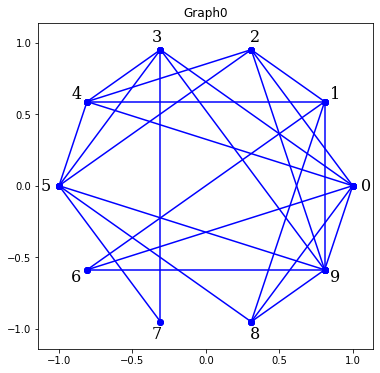

In [2]:
graph0 = Graph(10)

# parameters for plotter
font = {'family': 'serif',
        'color':  'k',
        'weight': 'normal',
        'size': 16,
        'horizontalalignment' : 'center',
        'verticalalignment' : 'center'
        }
params = {
    'marker' : 'o',
    'color' : 'b'
}

fig, ax = plt.subplots(figsize=(6, 6))
graph0.plot(ax, params, font)
plt.title('Graph0')
plt.show()

Добавление вершины и ребра

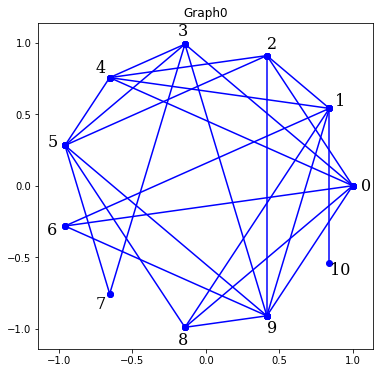

Object stored at index 10 : some info here


In [3]:
graph0.add_vertex('some info here')
graph0.add_edge(1, 10)
fig, ax = plt.subplots(figsize=(6, 6))
graph0.plot(ax, params, font)
plt.title('Graph0')
plt.show()

index = 10
print('Object stored at index {} : {}'.format(index, graph0[index]))

## Часть 2. Алгоритм нахождения N людей

Логика алгоритма : 
1. Рассмотрим дополнение к оригинальному графу $G'$, т.е. граф с тем же множеством вершин, но в котором две вершины смежны т.и.т. когда они НЕ смежны в $G$
2. Задача эквивалента задаче нахождения максимальной клики (полносвязанного графа) в $G'$
3. Реализуем один из сопосбов нахождения клик в графе (используем pivoting Bron-Kebosh) и выберем максимальную (оптимальнее не получится - задача NP)

Рекурентная функция для нахождения клик и функция для построения дополнения к графу:

In [4]:
# R, P, X are sets
# edges is a dict representing graph
def bron_kebosh2(R, P, X, edges, cliques = None):

    if cliques == None:
        cliques = []

    # declare R a maximal clique
    if (not P) and (not X):
        cliques.append(R)
        return
    
    # choose pivot
    if (P):
        pivot = P.pop()
        P.add(pivot)
    elif (X) :
        pivot = X.pop()
        X.add(pivot)

    for v in P.difference(edges[pivot]):
        new_P = P.intersection(edges[v])
        new_X = X.intersection(edges[v])
        bron_kebosh2(R + [v], new_P, new_X, edges, cliques)
        P.remove(v)
        X.add(v)

    return cliques

# build complement graph to original
def build_complement(edges, vertex_list):
    new_edges = {}
    verteces = set(vertex_list)

    for key in edges.keys():
        new_edges[key] = list(verteces - set(edges[key]))

    return new_edges, vertex_list

Проиллюстритурем как выглядит дополнение к графу на примере графа из части 1.

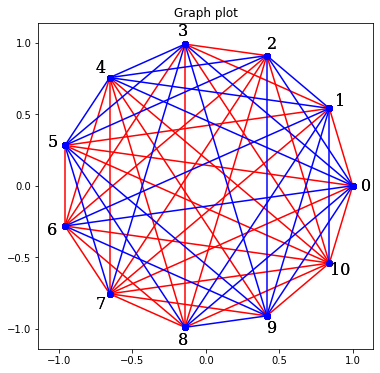

In [5]:
edges_stroke, _ = build_complement(graph0.edges, list(range(len(graph0))))
graph0_stroke = Graph()
graph0_stroke.edges = edges_stroke
graph0_stroke.verteces = graph0.verteces
graph0_stroke.N = graph0.N

params2 = {
    'marker' : 'o',
    'color' : 'r',
}
fig, ax = plt.subplots(figsize=(6, 6))
graph0_stroke.plot(ax, params2, font)
graph0.plot(ax, params, font)
plt.title('Graph plot')
plt.show()

Протестируем алгоритм поиска на нескольких случайных графах

In [18]:
from copy import deepcopy

sample = [10, 15, 20, 30, 35, 40]
graphs = []
solutions = []

for N_verteces in sample:

    test_graph = Graph(N_verteces)
    edges_stroke, _ = build_complement(test_graph.edges, list(range(len(test_graph))))
    
    verteces = list(range(len(test_graph)))
    res = bron_kebosh2([], set(verteces), set(), edges_stroke)

    max_cliq = []
    for cliq in res:
        if len(cliq) > len(max_cliq):
            max_cliq = cliq

    solutions.append(deepcopy(max_cliq))
    graphs.append(deepcopy(test_graph))


for solution, N_verteces in zip(solutions, sample):
    print('Graph with {} verteces :'.format(N_verteces), solution)

Graph with 10 verteces : [0, 3, 7]
Graph with 15 verteces : [7, 4, 8]
Graph with 20 verteces : [0, 4, 13, 18]
Graph with 30 verteces : [7, 4, 26, 25]
Graph with 35 verteces : [2, 10, 22, 9]
Graph with 40 verteces : [3, 4, 34, 20, 15, 14]


Черным цветом визуализированны выбранные в качестве решения узлы

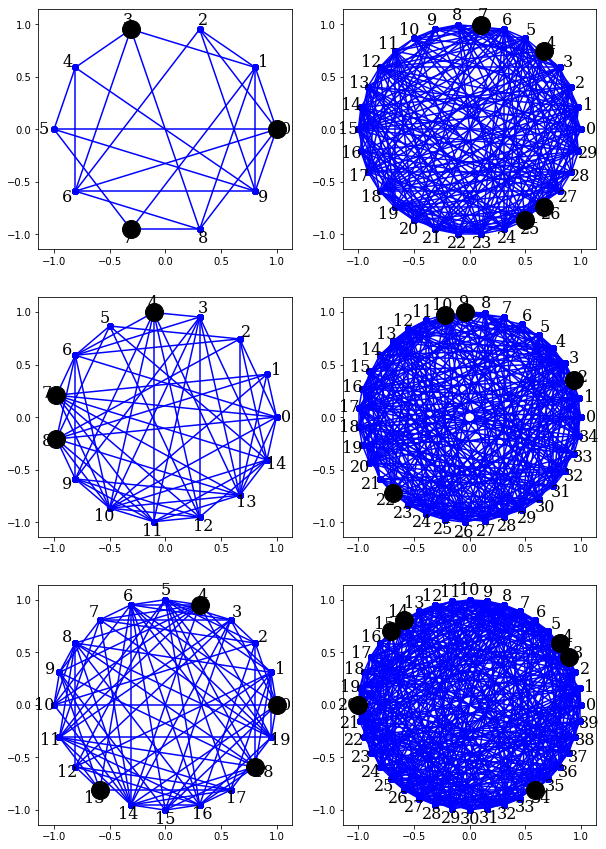

In [19]:
import numpy as np

fig, axs = plt.subplots(3, 2, figsize = (10, 15))

i = 0
for i in range(6):

    graphs[i].plot(axs[i % 3, i//3], params, font, acsent_nodes = solutions[i])

plt.show()